In [27]:
import numpy as np
from foe_foundry_nl.embeddings import embeddings, similarity
from foe_foundry_nl.data.monsters import get_canonical_monsters, name_to_key
from foe_foundry.creature_types import CreatureType
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
sns.set_palette("hls", len(CreatureType.all()))

In [28]:
monsters = get_canonical_monsters()
embeddings = embeddings(list(monsters.keys()), skip_if_missing=True)

acolyte is closest to initiate_of_the_elder_elementals,gremlin_bilge_bosun,archpriest,wardu,gnome_deep and furthest from imperator_penguin_swarm,bunyip,giant_sea_horse,angler_worm,sea_horse
veteran is closest to urochar,mountain_dwarf_soldier,soldier,veteran_swordbreaker_skeleton,half_red_dragon_veteran and furthest from corrupted_pixie,giant_seahorse,incubus,bereginyas,baleful_miasma
thug is closest to ochre_jelly,haleshi,wallflower,gaunt_one,bugbear and furthest from kikimora,dream_squire,ecstatic_bloom,undead_phoenix,siren
mage is closest to necromancer,apprentice_mage,shadow_elf_mage,mage_apprentice,archmage and furthest from rotsam,citrullus,monkey’s_bane_vine,rotsam_swarm,bunyip
archmage is closest to ogrepede,shadow_elf_mage,archfey,kobold_leviathan_hunter,quipper and furthest from millitaur,cueyatl,monkey’s_bane_vine,initiate_of_the_elder_elementals,soil_snake
balor is closest to balloon_spider,demon_balbazu,balara,baliri_demon,balor_general and furthest from musk_deer,spy,juni

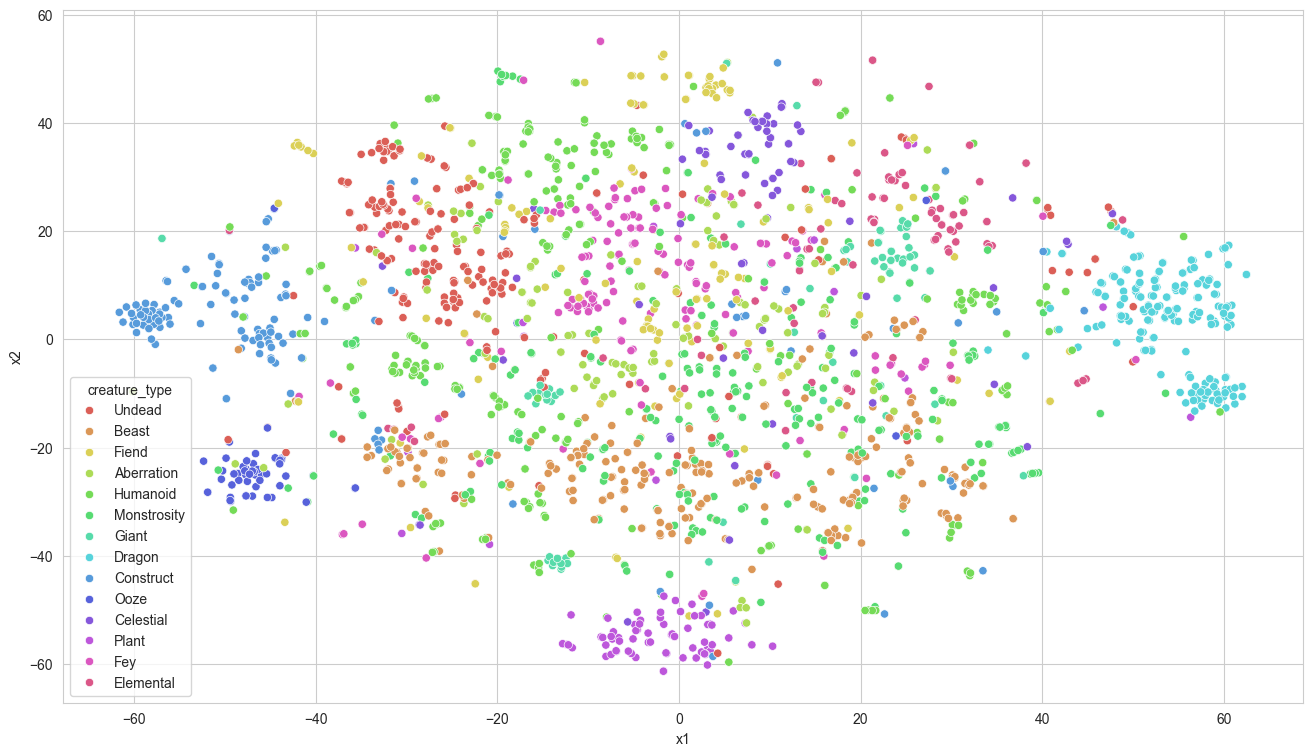

In [29]:
tsne = TSNE(n_components=2, random_state=20240711)
X = tsne.fit_transform(embeddings.embeddings)

x1, x2 = X[:, 0], X[:, 1]
ct = [monsters[k].creature_type for k in embeddings.keys]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(16,9))
sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax
)

srd_monsters = [
    "Acolyte",
    "Veteran",
    "Thug",
    "Mage",
    "Archmage",
    "Balor",
    "Adult Red Dragon"
]

for srd_monster in srd_monsters:
    key = name_to_key(srd_monster)
    index = embeddings.key_index(key)
    embedding = embeddings[index]

    mask = np.ones(embeddings.n, dtype=np.bool)
    mask[index] = False
    others = embeddings.embeddings[mask,:]

    similarities = similarity(embedding[np.newaxis, :], others)
    similarities = similarities.flatten()

    indexes = np.argsort(similarities)
    furthest = indexes[:5]
    closest = indexes[-5:]
    closest_keys = embeddings.keys[closest].tolist()
    furthest_keys = embeddings.keys[furthest].tolist()

    print(f"{key} is closest to {','.join(closest_keys)} and furthest from {','.join(furthest_keys)}")


